In [1]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv('/Users/yuangao/julianne_geneexpression/data/datafile_LUAD.csv').transpose().reset_index()

In [27]:
df.columns = df.iloc[0]
df.drop(index=0,inplace=True)

In [72]:
X=np.array(df)

In [56]:
labelsdf = pd.read_csv('/Users/yuangao/julianne_geneexpression/data/labels.csv').transpose().reset_index()
labelsdf.columns = labelsdf.iloc[0]
labelsdf.drop(index=0,inplace=True)

In [105]:
labelsdf

,days_to_last_follow_up,days_to_death,year_of_death,age_at_diagnosis,year_of_diagnosis,sample_type
1,Unnamed: 1,161,2006,25069,2006,Primary Tumor
2,Unnamed: 2,1790,2009,27993,2005,Primary Tumor
3,Unnamed: 3,896,2003,18762,2001,Primary Tumor
4,573,NaN,NaN,29989,2009,Primary Tumor
5,690,NaN,NaN,25316,2010,Primary Tumor
...,...,...,...,...,...,...
590,121,243,NaN,27087,2011,Primary Tumor
591,47.1,719,NaN,24684,2011,Primary Tumor
592,718,NaN,NaN,26273,2012,Primary Tumor
593,578.2,NaN,NaN,23620,2012,Primary Tumor


In [118]:
y = []
for value in labelsdf['days_to_death']:
    try:
        value=int(value)
        if np.isnan(value):
            y.append(0)
        else:
            if value<(365*5):
                y.append(1)
            else:
                y.append(0)
    except:
        y.append(0)
y = np.array(y)

In [119]:
print(X.shape, y.shape)

(594, 60483) (594,)


# random forest

In [155]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [165]:
X_train, X_test, y_train, y_test =train_test_split( X, y,train_size=0.8,random_state=1)

In [166]:
clf=XGBClassifier(n_estimators=200, eval_metric='error',use_label_encoder=False, n_jobs=-1,)
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [167]:
clf.score(X_test,y_test)

0.7226890756302521

In [168]:
roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.6358974358974359

# shapey values

In [169]:
import shap

In [170]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [188]:
dictionarydf=pd.read_csv('/Users/yuangao/julianne_geneexpression/data/dict.csv')

In [189]:
dictionarydf.columns

Index(['ens_id', 'gene', 'label'], dtype='object')

In [194]:
dictionarydf.index = dictionarydf['ens_id']

In [198]:
dictvalue = dictionarydf[['gene']].to_dict()

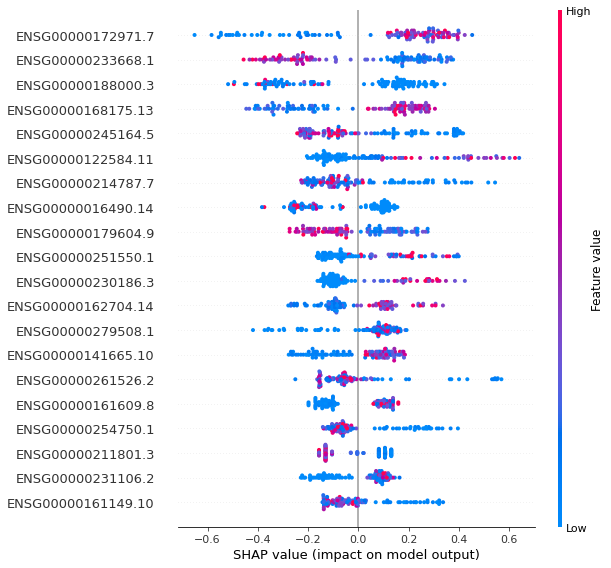

In [175]:
shap.summary_plot(shap_values,X_test,feature_names=df.columns.replace(),show=False)